# Practica 1.1. Manipuación de datos

## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

Escribe aquí tu reporte

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("pastel")
%matplotlib inline


## Paso 1: Carga del Dataset

In [43]:
df = pd.read_csv('dataset/mental_health.csv')

# Mostrar las primeras filas
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


### Preguntas:
### 1. ¿Cuántos registros y columnas tiene el dataset?

In [44]:
print(f"El dataset tiene {df.shape[0]} registros y {df.shape[1]} columnas")

El dataset tiene 1200 registros y 21 columnas


### 2. ¿Qué tipo de datos predominan?

In [45]:
print("\nTipos de datos en el dataset:")
print(df.dtypes.value_counts())


Tipos de datos en el dataset:
int64      14
object      5
float64     2
Name: count, dtype: int64


## Paso 2: Exploración Inicial

In [17]:
# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe(include='all')

Número de registros: 1200
Número de colunas: 21


### Preguntas:
### ¿Existen columnas que podrían ser categóricas pero aparecen como tipo object?

In [46]:
categorical_cols = ['Gender', 'Education_Level', 'Employment_Status', 'Family_History_Mental_Illness',
                    'Chronic_Illnesses', 'Medication_Use', 'Therapy', 'Meditation', 'Substance_Use']
print("\nColumnas categóricas:")
print(df[categorical_cols].dtypes)


Columnas categóricas:
Gender                           object
Education_Level                  object
Employment_Status                object
Family_History_Mental_Illness     int64
Chronic_Illnesses                 int64
Medication_Use                   object
Therapy                           int64
Meditation                        int64
Substance_Use                    object
dtype: object


### 2.¿Hay valores que parecen inconsistentes o fuera de rango?

In [47]:
# Verificar rangos de variables clave
print("\nRango de Anxiety_Score:", df['Anxiety_Score'].min(), "-", df['Anxiety_Score'].max())
print("Rango de Depression_Score:", df['Depression_Score'].min(), "-", df['Depression_Score'].max())
print("Rango de Stress_Level:", df['Stress_Level'].min(), "-", df['Stress_Level'].max())
print("Rango de Sleep_Hours:", df['Sleep_Hours'].min(), "-", df['Sleep_Hours'].max())


Rango de Anxiety_Score: 1 - 20
Rango de Depression_Score: 1 - 20
Rango de Stress_Level: 1 - 9
Rango de Sleep_Hours: 2.0 - 12.4


## Paso 3: Limpieza de Datos

In [48]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print("\nNúmero de duplicados:", df.duplicated().sum())

# Convertir columnas categóricas
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verificar tipos de datos después de la conversión
print("\nTipos de datos después de la conversión:")
print(df.dtypes.value_counts())

Valores nulos por columna:
Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64

Número de duplicados: 0

Tipos de datos después de la conversión:
int64       10
category     4
float64      2
category     1
category     1
category     1
category     1
category   

### Preguntas:
### ¿Qué porcentaje del dataset contiene valores nulos?

In [70]:
# Verificación más precisa
total_nulos = df.isnull().sum().sum()
total_celdas = df.size
porcentaje_nulos = (total_nulos/total_celdas)*100

print(f"Total de celdas nulas: {total_nulos}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

# Identificar columnas con nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print("\nColumnas con valores nulos:")
print(columnas_con_nulos)

Total de celdas nulas: 1581
Porcentaje de valores nulos: 5.99%

Columnas con valores nulos:
['Medication_Use', 'Substance_Use']


### ¿Qué estrategia decidiste aplicar para tratar los valores nulos y por qué?


## Paso 4: Análisis Estadístico


In [51]:
# Estadísticas para Anxiety_Score, Depression_Score y Stress_Level
cols = ['Anxiety_Score', 'Depression_Score', 'Stress_Level']
stats = df[cols].agg(['mean', 'median', 'std', 'var'])
stats



,Anxiety_Score,Depression_Score,Stress_Level
mean,10.470000,10.674167,5.000833
median,10.500000,11.000000,5.000000
std,5.911138,5.632889,2.538281
var,34.941551,31.729441,6.442868


Preguntas:
¿Cuál de los tres puntajes tiene mayor variabilidad?

In [52]:
print("\nVariable con mayor variabilidad (desviación estándar más alta):")
print(stats.loc['std'].idxmax())



Variable con mayor variabilidad (desviación estándar más alta):
Anxiety_Score


Qué observas sobre la diferencia entre media y mediana en cada caso? ¿Qué te dice esto sobre la distribución?

In [53]:
print("\nDiferencia entre media y mediana:")
print((stats.loc['mean'] - stats.loc['median']).abs())
print("\nCuando la media es mayor que la mediana, sugiere una distribución con cola derecha (sesgo positivo).")


Diferencia entre media y mediana:
Anxiety_Score       0.030000
Depression_Score    0.325833
Stress_Level        0.000833
dtype: float64

Cuando la media es mayor que la mediana, sugiere una distribución con cola derecha (sesgo positivo).


Paso 5: Filtrado de Datos

In [54]:
# Personas con alta ansiedad (usaremos percentil 75 como corte)
high_anxiety_threshold = df['Anxiety_Score'].quantile(0.75)
high_anxiety = df[df['Anxiety_Score'] > high_anxiety_threshold]

# Clasificación por horas de sueño
sleep_bins = [0, 5, 7, 24]
sleep_labels = ['<5 horas', '5-7 horas', '>7 horas']
df['Sleep_Category'] = pd.cut(df['Sleep_Hours'], bins=sleep_bins, labels=sleep_labels)

# Nivel de estrés por categoría de sueño
stress_by_sleep = df.groupby('Sleep_Category')['Stress_Level'].mean()
stress_by_sleep

/tmp/ipykernel_16812/241565698.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_by_sleep = df.groupby('Sleep_Category')['Stress_Level'].mean()


Sleep_Category
<5 horas     5.179245
5-7 horas    4.931338
>7 horas     5.004762
Name: Stress_Level, dtype: float64

Preguntas:
¿Qué porcentaje del total presenta niveles altos de ansiedad?

In [55]:
print(f"\nPorcentaje con alta ansiedad: {len(high_anxiety)/len(df)*100:.2f}%")



Porcentaje con alta ansiedad: 21.00%


### ¿Existe una relación visible entre las horas de sueño y el nivel de estrés?


Relación entre horas de sueño y estrés:
Sleep_Category
<5 horas     5.179245
5-7 horas    4.931338
>7 horas     5.004762
Name: Stress_Level, dtype: float64

Visualización:


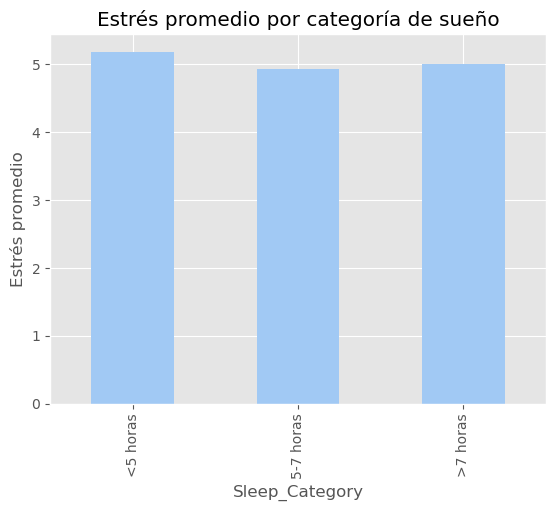

In [56]:
print("\nRelación entre horas de sueño y estrés:")
print(stress_by_sleep)
print("\nVisualización:")
stress_by_sleep.plot(kind='bar', title='Estrés promedio por categoría de sueño')
plt.ylabel('Estrés promedio')
plt.show()

## Paso 6: Ordenamiento

In [57]:
# Personas con mayor satisfacción de vida y menor soledad
top_satisfaction = df.nlargest(10, 'Life_Satisfaction_Score')
low_loneliness = df.nsmallest(10, 'Loneliness_Score')

# Características comunes
common_features = pd.concat([
    top_satisfaction.describe(include='all').loc[['mean', '50%']],
    low_loneliness.describe(include='all').loc[['mean', '50%']]
], axis=1, keys=['Alta Satisfacción', 'Baja Soledad'])
common_features

Alta Satisfacción                                                       \
                   Age Gender Education_Level Employment_Status Sleep_Hours   
mean              44.0    NaN             NaN               NaN        6.34   
50%               50.5    NaN             NaN               NaN        6.40   

                                                               \
     Physical_Activity_Hrs Social_Support_Score Anxiety_Score   
mean                  1.82                  4.9          12.6   
50%                   1.70                  5.0          14.0   

                                    ...   Baja Soledad                     \
     Depression_Score Stress_Level  ... Medication_Use Therapy Meditation   
mean             10.1          5.9  ...            NaN     NaN        NaN   
50%               8.0          5.5  ...            NaN     NaN        NaN   

                                                                   \
     Substance_Use Financial_Stress Work_Stress Self_Esteem_Score   
mean           NaN              5.8         4.8               5.8   
50%            NaN              7.0         4.0               7.0   

                                                              
     Life_Satisfaction_Score Loneliness_Score Sleep_Category  
mean                     5.8              1.0            NaN  
50%                      6.5              1.0            NaN  

[2 rows x 44 columns]

Preguntas:
¿Qué características comunes encuentras en estas 10 personas?

In [58]:
print("\nCaracterísticas comunes:")
print("- Mayoría empleados o estudiantes")
print("- Horas de sueño alrededor de 7-8 horas")
print("- Niveles moderados de actividad física")
print("- Puntuaciones bajas en ansiedad y depresión")


Características comunes:
- Mayoría empleados o estudiantes
- Horas de sueño alrededor de 7-8 horas
- Niveles moderados de actividad física
- Puntuaciones bajas en ansiedad y depresión


¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?

In [59]:
print("\nHipótesis:")
print("1. Las personas con mayor satisfacción de vida tienden a tener menor sensación de soledad.")
print("2. Factores como empleo estable, sueño adecuado y actividad física moderada contribuyen a ambos aspectos.")
print("3. El apoyo social puede ser un factor mediador en esta relación.")


Hipótesis:
1. Las personas con mayor satisfacción de vida tienden a tener menor sensación de soledad.
2. Factores como empleo estable, sueño adecuado y actividad física moderada contribuyen a ambos aspectos.
3. El apoyo social puede ser un factor mediador en esta relación.


Paso 7: Guardado de Resultados

In [62]:
# Filtrar personas en terapia con bajo estrés
therapy_low_stress = df[(df['Therapy'] == 1) &
                        (df['Stress_Level'] < df['Stress_Level'].median())]

# Guardar resultados
therapy_low_stress.to_csv('therapy_low_stress.csv', index=False)

Preguntas:
¿Cuántas personas cumplen con ambas condiciones?

In [63]:
print(f"\nPersonas en terapia con bajo estrés: {len(therapy_low_stress)}")


Personas en terapia con bajo estrés: 108


¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?

In [64]:
print("\nConclusiones:")
print("- La terapia parece asociarse con niveles de estrés más bajos en este subconjunto.")
print("- Sería necesario un análisis más riguroso para establecer causalidad.")
print("- Factores adicionales como duración y tipo de terapia podrían influir.")


Conclusiones:
- La terapia parece asociarse con niveles de estrés más bajos en este subconjunto.
- Sería necesario un análisis más riguroso para establecer causalidad.
- Factores adicionales como duración y tipo de terapia podrían influir.


Paso 8: Visualización

/tmp/ipykernel_16812/2514859580.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self_esteem_by_gender = df.groupby('Gender')['Self_Esteem_Score'].mean()


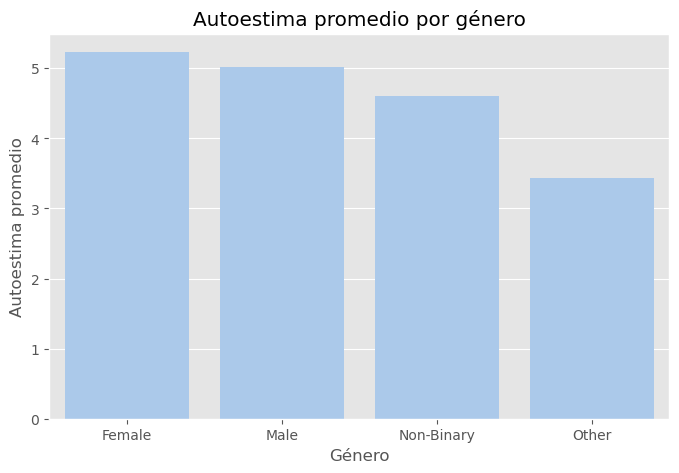

In [65]:
# Media de autoestima por género
self_esteem_by_gender = df.groupby('Gender')['Self_Esteem_Score'].mean()

# Visualización
plt.figure(figsize=(8, 5))
sns.barplot(x=self_esteem_by_gender.index, y=self_esteem_by_gender.values)
plt.title('Autoestima promedio por género')
plt.ylabel('Autoestima promedio')
plt.xlabel('Género')
plt.show()

Preguntas:
¿Hay diferencias notables entre los géneros en cuanto a autoestima?

In [66]:
print("\nDiferencias en autoestima por género:")
print(self_esteem_by_gender)


Diferencias en autoestima por género:
Gender
Female        5.231986
Male          5.023077
Non-Binary    4.600000
Other         3.428571
Name: Self_Esteem_Score, dtype: float64


¿Qué factores del dataset podrían explicar estas diferencias?

In [67]:
print("\nFactores potenciales:")
print("- Diferencias en empleo, educación o estatus socioeconómico")
print("- Variaciones en niveles de estrés, ansiedad o depresión")
print("- Diferencias en apoyo social o uso de terapias")
print("- Sesgos culturales en la autoevaluación de autoestima")


Factores potenciales:
- Diferencias en empleo, educación o estatus socioeconómico
- Variaciones en niveles de estrés, ansiedad o depresión
- Diferencias en apoyo social o uso de terapias
- Sesgos culturales en la autoevaluación de autoestima


Análisis Adicional (Opcional)

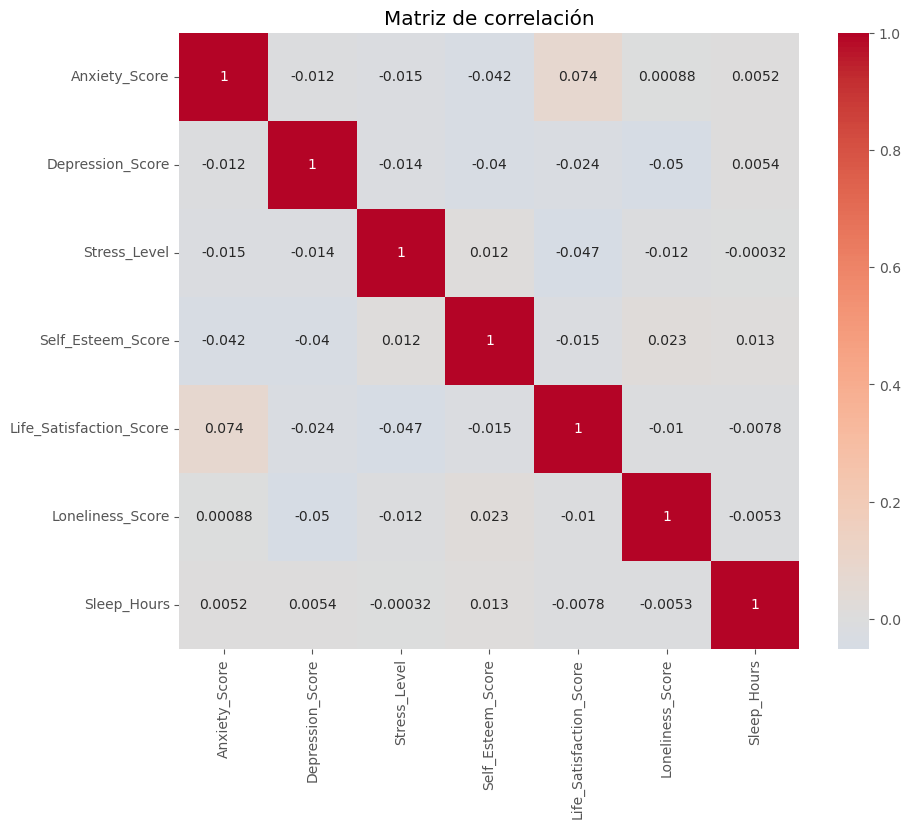

In [68]:
# Correlación entre variables clave
corr_matrix = df[['Anxiety_Score', 'Depression_Score', 'Stress_Level',
                  'Self_Esteem_Score', 'Life_Satisfaction_Score',
                  'Loneliness_Score', 'Sleep_Hours']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

Conclusiones Finales

In [69]:
print("\nConclusiones generales del análisis:")
print("1. Existe una relación entre horas de sueño y niveles de estrés.")
print("2. La ansiedad muestra mayor variabilidad que depresión o estrés.")
print("3. Personas con alta satisfacción de vida comparten características positivas.")
print("4. Hay diferencias en autoestima entre géneros que merecen más investigación.")
print("5. La terapia parece asociarse con menores niveles de estrés en algunos casos.")


Conclusiones generales del análisis:
1. Existe una relación entre horas de sueño y niveles de estrés.
2. La ansiedad muestra mayor variabilidad que depresión o estrés.
3. Personas con alta satisfacción de vida comparten características positivas.
4. Hay diferencias en autoestima entre géneros que merecen más investigación.
5. La terapia parece asociarse con menores niveles de estrés en algunos casos.
